### Integrantes
- José Martinez
- Rodrigo Montecinos.

# En lo que sigue se importarán las librerias necesarias.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random


## Creamos los valores aleatorios para poder rankear los productos.

In [3]:
### Preferencia para probar el producto a_{i}
def appeal(n):
  a = np.random.uniform(0,1,n)
  a /= np.sum(a)
  return a

### Generamos q_{i}, la probabilidad condicional de comprar el producto i dado que
### el cliente lo probó.

def quality(n):
  q = np.random.uniform(0,1,n)
  q = np.sort(q)[::-1]
  q /= np.sum(q)
  return q

### Generamos el vector de visibilidad
def visibility(n):
  v = np.random.uniform(0,1,n)
  v = np.sort(v)[::-1]
  v /= np.sum(v)
  return v


## Supondremos que estamos en el tiempo t, en el que se realiza una acción, es decir, el cliente en el tiempo t puede decidir si comprar unos de los productos o no. Para esto escribiremos el vector d que posee la cantidad de veces que a comprado cada producto i en el tiempo t.

In [4]:

def purchased_products(X): # Entrega el vector de cantidad de compras de cada producto para una cadena de Markov.
  d = np.zeros(21 ,dtype = int)
  compradores=0
  for i in range(21):
    comprador_i=0
    for j in range(len(X)-1):
      if X[j]==X[j+1]:
        compradores += 1
        if X[j]==X[i]:
          comprador_i += 1
    d[i]=comprador_i
  return compradores, d



## Se crea un vector que le da un ranking aleatorio al producto i, por ejemplo si la posición j tiene un valor k, entonces el producto j+1 está rankeado en la posición k.

In [5]:
def ranking_aleatorio(n): #Entrega un ranking aleatorio de tamaño n
    # Creamos una secuencia de números del 1 al n.
    numeros = list(range(n))
    # Mezcla la secuencia de forma aleatoria.
    random.shuffle(numeros)
    sigma = np.array(numeros)

    ## Creamos el vector final que posee dos coordenadas.
    #sigma = np.array([[i+1,numeros[i]] for i in range(n)])
    return sigma



## Se crea la función de probabilidad de que el cliente en el tiempo t va a probar el producto i dado un ranking sigma.

In [6]:
n = 21
P=np.array([[0.156,0.152,0.203,0.141,0.109,0.055,0.016,0.004,0.02,0.008,0.004,0,0.012,0,0.004,0.09,0.008,0,0.004,0,0.016], #Matriz de transicion
            [0.211,0.133,0.219,0.086,0.086,0.047,0.008,0.008,0,0.023,0.023,0.016,0,0,0,0.117,0.008,0,0.008,0,0.008],
            [0.076,0.102,0.279,0.01,0.198,0.041,0,0,0.01,0.03,0.061,0.005,0,0,0,0.147,0.02,0,0.02,0,0],
            [0.093,0.126,0.086,0.093,0.278,0.04,0.026,0.007,0,0.013,0.06,0,0.013,0,0.007,0.152,0.007,0,0,0,0],
            [0.137,0.021,0.173,0.021,0.323,0.021,0.031,0.021,0,0,0.052,0,0,0,0,0.156,0,0,0,0,0.01],
            [0.048,0.095,0.143,0.143,0.095,0.048,0.048,0.048,0.048,0,0.143,0,0,0,0.048,0.048,0.048,0,0,0,0],
            [0.038,0.038,0.073,0.038,0.154,0.038,0.277,0,0.038,0.038,0,0.038,0,0,0,0.192,0.038,0,0,0,0],
            [0,0,0.214,0,0.214,0.357,0,0.143,0,0,0,0,0,0,0,0,0,0,0,0.071,0],
            [0.077,0.077,0,0.231,0.077,0.154,0,0,0,0.154,0.077,0,0,0.077,0,0.077,0,0,0,0,0],
            [0.105,0.053,0.053,0.053,0.158,0.263,0.053,0.053,0,0.054,0,0,0,0,0.053,0.053,0.053,0,0,0,0],
            [0,0.25,0,0,0.083,0,0,0,0,0.083,0.25,0,0,0,0,0.167,0.083,0,0,0,0.083],
            [0,0.25,0,0,0,0,0.5,0,0,0,0,0.25,0,0,0,0,0,0,0,0,0],
            [0,0.25,0,0,0,0,0.5,0,0,0,0,0.25,0,0,0,0,0,0,0,0,0],
            [0,0.125,0,0,0.125,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0.125,0.125,0],
            [0.222,0.111,0,0,0.222,0.111,0,0.222,0,0,0,0,0,0,0.112,0,0,0,0,0,0],
            [0,0.211,0.211,0.105,0.105,0,0,0,0,0,0.053,0,0,0,0,0.263,0,0,0,0,0.053],
            [0,0,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5],
            [0,0,0,0.2,0.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0.2,0,0.1,0.4,0.1,0,0,0,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0],
            [0,0.25,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0,0,0.15,0],
            [0.375,0,0,0.125,0.125,0.25,0,0,0,0,0,0,0,0,0,0.125,0,0,0,0,0]])
mu=np.array([0.256,0.128,0.197,0.151,0.096,0.021,0.026,0.014,0.013,0.019,0.012,0.002,0.004,0.008,0.009,0.019,0.002,0.005,0.01,0,0.008]) #Distribucion inicial
def probabilidad_probar_i(i,sigma,dd): #P_i(sigma, d^t)
  numerador = vis[sigma[i]]*(a[i] + dd[i])
  den = sum([vis[sigma[j]]*(a[j] + dd[j]) for j in range(n)])
  return numerador/den


In [7]:
def Trans(x, u, P): #Funcion de transicion para construir la Cadena de Markov
    y=0;
    while sum(P[x-1][i] for i in range(y)) < u:
        y=y+1
    if y==21:
        y=20
    return y

def CM(u,mu,P): #Construccion de cadena de Markov
    X=np.zeros(len(u));
    X[0]=np.random.randint(0,21)
    for n in range(1,len(u)):
        z=int(X[n-1])
        X[n]=Trans(z,u[n],P)
    return X

In [8]:
U=np.random.uniform(0,0.95,size=100000) #Uniformes para construir la cadena de Markov

Text(0.5, 1.0, 'Cadena de Markov para T=10')

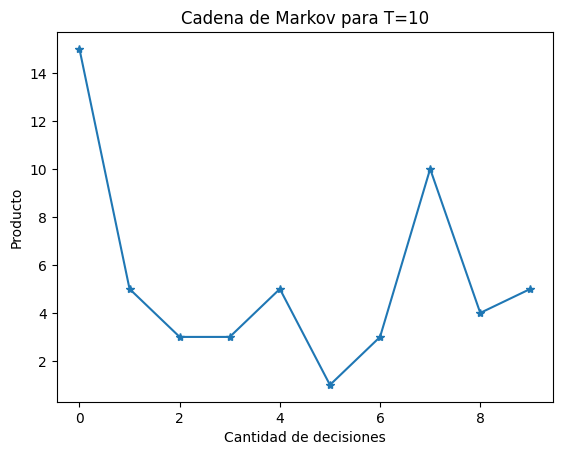

In [10]:
X=CM(U[:10],mu,P) #Cadena de Markov que simula el mercado para 10 decisiones
plt.plot(X, marker='*')
plt.xlabel('Cantidad de decisiones')
plt.ylabel('Producto')
plt.title('Cadena de Markov para T=10')

Text(0.5, 1.0, 'Cadena de Markov para T=100')

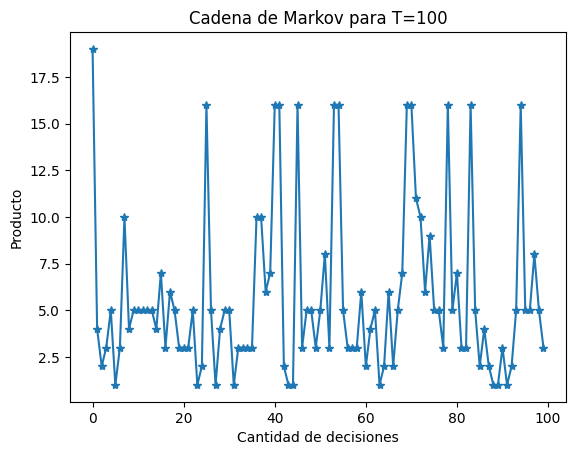

In [11]:
X=CM(U[:100],mu,P) #Cadena de Markov que simula el mercado para 100 decisiones
plt.plot(X, marker='*')
plt.xlabel('Cantidad de decisiones')
plt.ylabel('Producto')
plt.title('Cadena de Markov para T=100')

Text(0.5, 1.0, 'Cadena de Markov para T=1000')

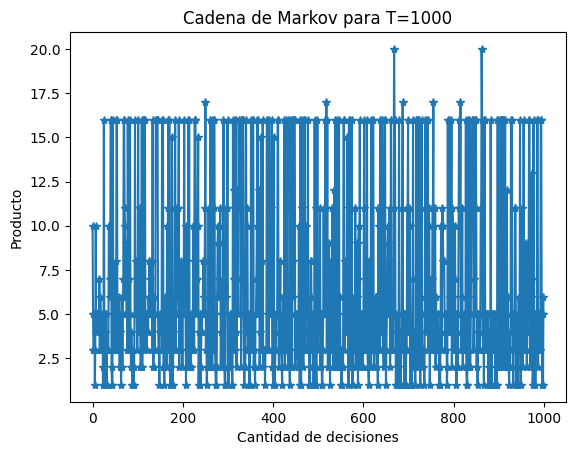

In [12]:
X=CM(U[:1000],mu,P) #Cadena de Markov que simula el mercado para 1000 decisiones
plt.plot(X, marker='*')
plt.xlabel('Cantidad de decisiones')
plt.ylabel('Producto')
plt.title('Cadena de Markov para T=1000')

Text(0.5, 1.0, 'Cadena de Markov para T=100000')

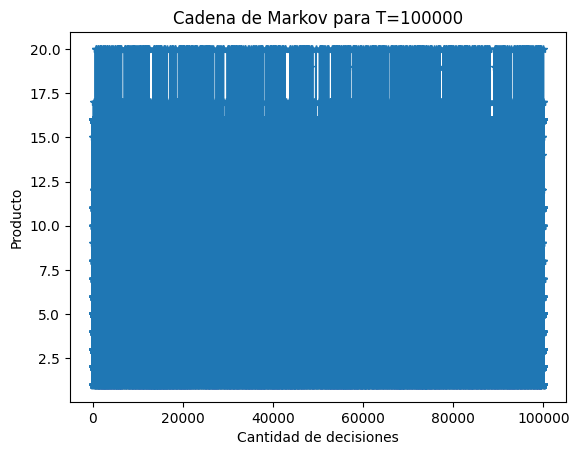

In [13]:
X=CM(U,mu,P) #Cadena de Markov que simula el mercado para 100000 decisiones
plt.plot(X, marker='*')
plt.xlabel('Cantidad de decisiones')
plt.ylabel('Producto')
plt.title('Cadena de Markov para T=100000')

In [14]:
def purchased_products(X): # Entrega la cantidad de ventas y el vector de cantidad de compras de cada producto para una cadena de Markov.
  d = np.zeros(21 ,dtype = int)
  for i in range(21):
    comprador_i=0
    for j in range(len(X)-1):
      if X[j]==X[j+1] and X[j]==X[i]:
        comprador_i += 1
    d[i]=comprador_i
    compradores=sum(d)
  return compradores, d

In [15]:
purchased_products(X)

(84531,
 array([1727, 5573, 1727, 5573, 6246, 1631, 5573,  133,  601, 6246, 6246,
        6246, 6246, 6246,  601,  745, 5573,  206, 6246, 5573, 5573]))

## Procedemos a definir la función de energía para poder aplicar Simulated annealing.

In [16]:
n=21
q=quality(n) #Vector de calidad
vis = visibility(n) #Vector de visibilidad
a = appeal(n) #Vector de atractivo


In [17]:
print(f'a={a}')
print(f'v={vis}')
print(f'q={q}')

a=[0.07879322 0.0791384  0.0543226  0.02232851 0.00480367 0.02664152
 0.05377072 0.0878365  0.02143768 0.04900356 0.08319928 0.04944839
 0.00474034 0.00392814 0.09331537 0.07310134 0.03606548 0.08648848
 0.0534094  0.00596862 0.03225877]
v=[0.09651568 0.09457689 0.09132331 0.07813713 0.07698001 0.06913468
 0.06737125 0.05643433 0.05570159 0.05535063 0.04629734 0.04331192
 0.04064315 0.03568361 0.02571448 0.01788084 0.01211643 0.01143111
 0.01117773 0.01075584 0.00346206]
q=[0.09367089 0.08837237 0.08569264 0.08547129 0.08537916 0.07310435
 0.06202197 0.05821912 0.05558033 0.05054069 0.04812609 0.03294802
 0.03255843 0.03192525 0.03102385 0.0302271  0.01684532 0.01113198
 0.0102277  0.00986442 0.00706903]


In [18]:
def energy_function(P_i,q): #Funcion de energia
  n = len(q)
  E = sum([P_i[i]*q[i] for i in range(n)])
  return E


El grafo que se construye para utilizar simulated annealing es el siguiente:


*   El conjunto de vertices corresponde a las permutaciones de largo n, $S_n$.
*   Dos elementos de $S_n$ están unidos por una arista si difieren en solo dos elementos (ambos elementos están intercambiados).


*   El grado de cada vertice en este grafo es $\binom{21}{2}$






## La siguiente función entrega una permutación adyacente a $rank$ elegida de manera uniforme.

In [19]:
def new_ranking(rank):
    n=len(rank);
    i=np.random.randint(n);
    j=np.random.randint(n);
    if i==j:
        j=np.random.randint(n);
    new_rank=rank.copy();
    new_rank[i]=rank[j];
    new_rank[j]=rank[i];
    return new_rank


## Aplicación de simulated annealing

In [20]:

def SA(beta,nf):
  X=ranking_aleatorio(n)
  U=np.random.uniform(size=nf)
  for j in range(1,nf):
    Y=new_ranking(X)
    energy_X=energy_function(X,q)
    energy_Y=energy_function(Y,q)
    if U[j]<=min(np.exp(-beta*(energy_X-energy_Y)),1):
      X=np.copy(Y)
    return X



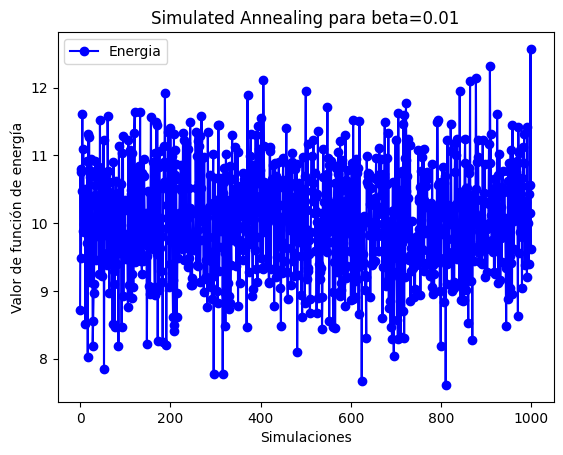

In [37]:
### Vamos a graficar los SA para poder ver el máximo estimado.
N = 1000000
X = np.zeros(1000, dtype=float)
for i in range(1000):
  s_a = SA(0.01,N)
  X[i] = energy_function(s_a,q)

selected_X = X

indices = list(range(0, len(X)))

# Graficamos
plt.plot(indices, selected_X, marker='o', linestyle='-', color='b', label='Energia')
plt.title('Simulated Annealing para beta=0.01')
plt.xlabel('Simulaciones')
plt.ylabel('Valor de función de energía')
plt.legend()
plt.show()


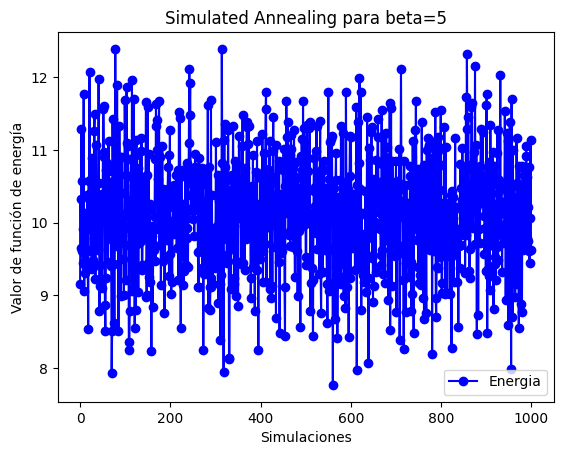

In [38]:
### Vamos a graficar los SA para poder ver el máximo estimado.

XX = np.zeros(1000, dtype=float)
for i in range(1000):
  s_a = SA(5,N)
  XX[i] = energy_function(s_a,q)

selected_XX = XX

indices = list(range(0, len(XX)))

# Graficamos
plt.plot(indices, selected_XX, marker='o', linestyle='-', color='b', label='Energia')
plt.title('Simulated Annealing para beta=5')
plt.xlabel('Simulaciones')
plt.ylabel('Valor de función de energía')
plt.legend()
plt.show()